In [1]:
pip install jupyter_contrib_nbextensions

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import svm 
from sklearn.model_selection import GridSearchCV

In [6]:
code=pd.read_csv('C:\\Users\\jagru\\Downloads\\xyz\\spam.csv',encoding = "ISO-8859-1")

# load  dataset 

In [7]:
print(code.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [8]:
code.sample()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3154,ham,Ok...,NaN,NaN,NaN


In [9]:
code.shape

(5572, 5)

# Data Cleaning

In [10]:
code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
code.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
code.sample(5)

,v1,v2
1653,ham,I was at bugis juz now wat... But now i'm walk...
3127,ham,would u fuckin believe it they didnt know i ha...
1518,ham,Shall i ask one thing if you dont mistake me.
342,ham,Where u been hiding stranger?
4166,ham,Are you at work right now ?


In [13]:
#rename column
code.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [14]:
code.sample(5)

,target,text
2648,ham,"Hi, can i please get a &lt;#&gt; dollar loan..."
4065,ham,Fyi I'm gonna call you sporadically starting a...
2881,ham,Hi Harish's rent has been transfred to ur Acnt.
5481,ham,Shall call now dear having food
618,ham,I come n pick Ì_ up... Come out immediately af...


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
encoder.fit_transform(code['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
 code['target']=encoder.fit_transform(code['target'])

In [18]:
code.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# find missing Values
code.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
#check for duplicate values
code.duplicated().sum()

403

In [21]:
code.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [22]:
code =code.drop_duplicates(keep='first')

In [23]:
code.duplicated().sum()

0

In [24]:
code.shape

(5169, 2)

# Exploratory Data Analysis 

In [25]:
code.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
code['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x246889105e0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')])

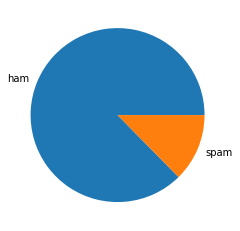

In [27]:
import matplotlib.pyplot as plt
plt.pie(code['target'].value_counts(),labels=['ham','spam'])

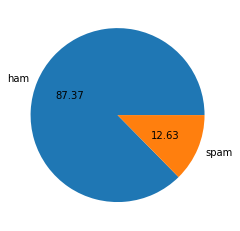

In [28]:
import matplotlib.pyplot as plt
plt.pie(code['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

In [29]:
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jagru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
code['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [32]:
code['num_characters']= code['text'].apply(len)

In [33]:
code.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
# find out number of words
code['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [35]:
code['num_words']= code['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [36]:
code.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
code['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [38]:
code['num_sentences']=code['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [39]:
code.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [40]:
code[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,18.453279
std,58.236293,13.324793,13.324793
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,60.000000,15.000000,15.000000
75%,117.000000,26.000000,26.000000
max,910.000000,220.000000,220.000000


In [41]:
# this is for ham sms
code[code['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,17.120903
std,56.358207,13.493725,13.493725
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,90.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [42]:
# this is spam sms
code[code['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,27.667688
std,30.137753,7.008418,7.008418
min,13.000000,2.000000,2.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


In [43]:
code[code['target']==0]['num_characters']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 4516, dtype: int64

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

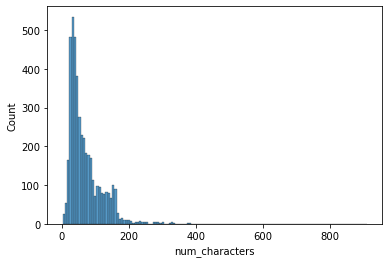

In [44]:
sns.histplot(code[code['target']==0]['num_characters'])

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

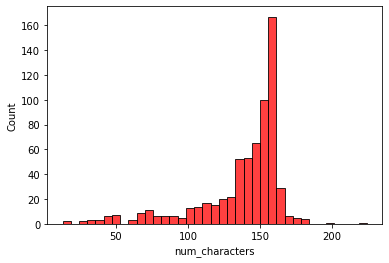

In [45]:
sns.histplot(code[code['target']==1]['num_characters'],color='Red')

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

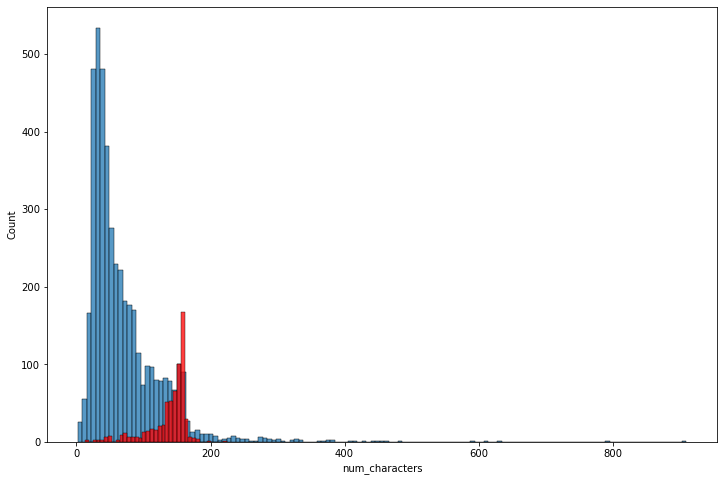

In [46]:
plt.figure(figsize=(12,8))
sns.histplot(code[code['target']==0]['num_characters'])
sns.histplot(code[code['target']==1]['num_characters'],color='Red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

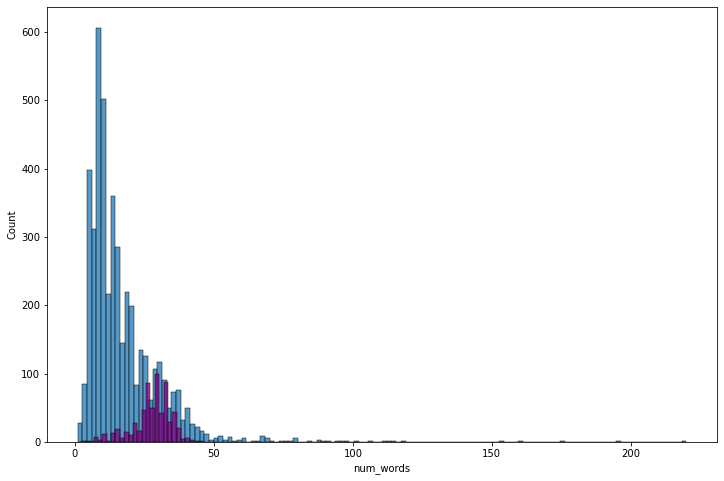

In [47]:
plt.figure(figsize=(12,8))
sns.histplot(code[code['target']==0]['num_words'])
sns.histplot(code[code['target']==1]['num_words'],color='purple')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

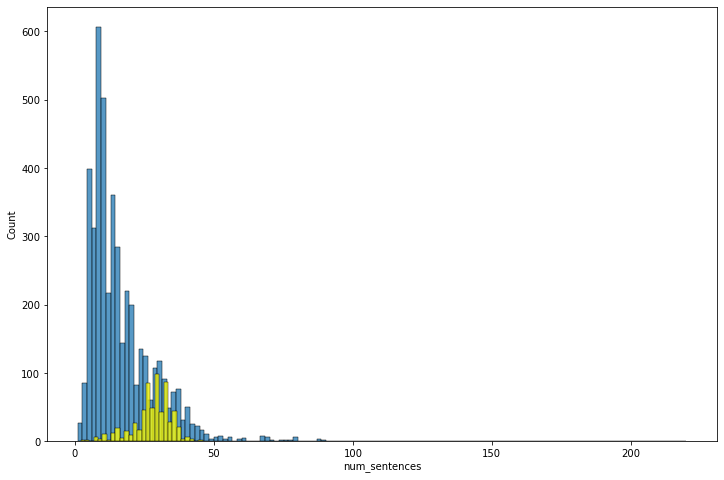

In [48]:
plt.figure(figsize=(12,8))
sns.histplot(code[code['target']==0]['num_sentences'])
sns.histplot(code[code['target']==1]['num_sentences'],color='yellow')

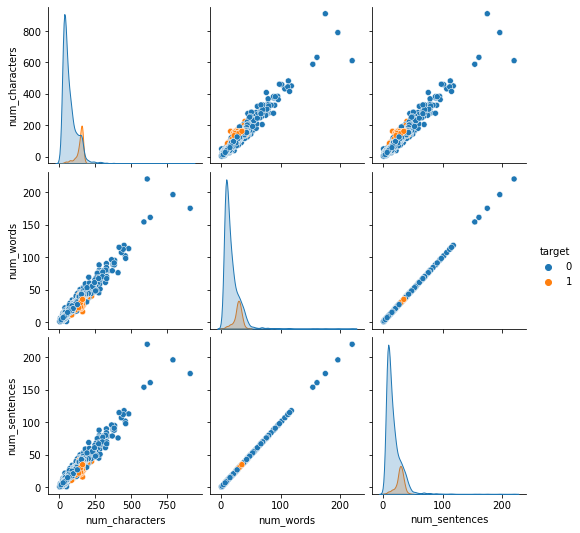

In [49]:
sns.pairplot(code,hue='target')

<AxesSubplot:>

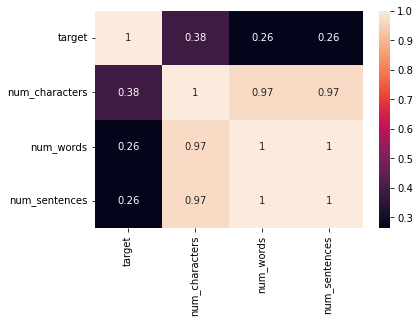

In [57]:
sns.heatmap(code.corr(),annot= True)

# Data Preprocessing
.Lower Case
.Tokenization
.Removeing Spacial Character
.Removing Stop wordsand punctuation
.Stemming

In [68]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [72]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [76]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
        text =y[:]
        y.clear()
        for i in text:
            if i not in stopwords.words('english') and  i not in string.punctuation:
                y.append(i)
        text =y[:]
        y.clear()
        for i in text:
            y.append(ps.stem(i))
                    
                
        return " ".join(y)   

In [77]:
transform_text('Hi How are You')

'hi'

In [78]:
transform_text('Hi How are You %% eg ')

'hi'

In [79]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jagru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
transform_text('i like this python coding class in YT ,What About you ?')

''

In [81]:
code['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [82]:
transform_text('I love TO be a python COding Person')

''

In [83]:
code['text'].apply(transform_text)

0         go
1         ok
2       free
3          u
4        nah
        ... 
5567        
5568        
5569    piti
5570        
5571    rofl
Name: text, Length: 5169, dtype: object

In [84]:
code['transform_text'] = code['text'].apply(transform_text)

In [85]:
code.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go
1,0,Ok lar... Joking wif u oni...,29,8,8,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free
3,0,U dun say so early hor... U c already then say...,49,13,13,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah


In [86]:
import sys
print(sys.executable)

C:\Users\jagru\anaconda3\python.exe


In [87]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [88]:
import  matplotlib.pyplot as plt
from wordcloud import WordCloud


In [94]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [95]:
wc.generate(code[code['target']==1]['transform_text'].str.cat(sep=" "))

In [96]:
spam_wc= wc.generate(code[code['target'] == 1]['transform_text'].str.cat(sep=" "))

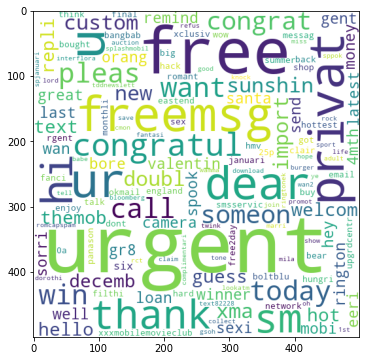

In [98]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [100]:
ham_wc= wc.generate(code[code['target'] == 0]['transform_text'].str.cat(sep=" "))

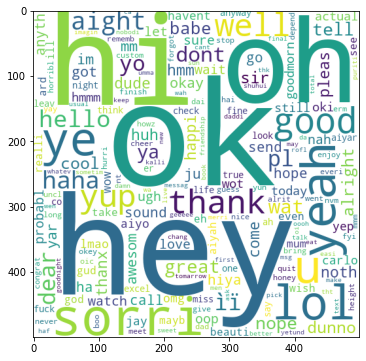

In [102]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [103]:
code.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go
1,0,Ok lar... Joking wif u oni...,29,8,8,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free
3,0,U dun say so early hor... U c already then say...,49,13,13,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah


In [132]:
spam_corpus=[]
for msg in code[code["target"]==1]["transform_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [107]:
len(spam_corpus)

480

In [110]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,urgent,47
1,free,28
2,u,16
3,privat,15
4,freemsg,14
5,ur,14
6,dear,13
7,hi,12
8,thank,10
9,sm,10


C:\Users\jagru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


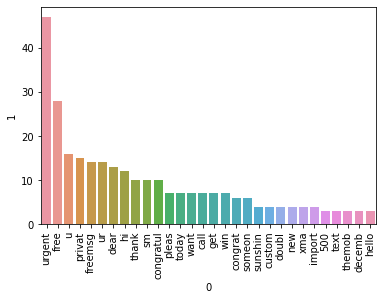

In [117]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [118]:
ham_corpus=[]
for msg in code[code["target"]==0]["transform_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [119]:
len(ham_corpus)

2528

C:\Users\jagru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


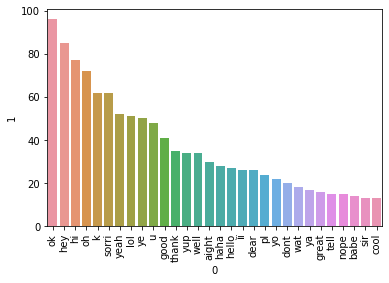

In [120]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

# Model Building

In [123]:
# text vectorization
# Using Bag of Words
code.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go
1,0,Ok lar... Joking wif u oni...,29,8,8,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free
3,0,U dun say so early hor... U c already then say...,49,13,13,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah


In [133]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [136]:
X=cv.fit_transform(code['transform_text']).toarray()

In [137]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [139]:
X.shape

(5169, 834)

In [140]:
Y=code['target'].values

In [141]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

In [146]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

In [161]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [147]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [149]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.3539651837524178
[[232 664]
 [  4 134]]
0.16791979949874686


In [152]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9003868471953579
[[895   1]
 [102  36]]
0.972972972972973


In [153]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.8936170212765957
[[895   1]
 [109  29]]
0.9666666666666667


In [154]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [155]:
X=tfidf.fit_transform(code['transform_text']).toarray()

In [156]:
X.shape

(5169, 834)

In [157]:
Y=code['target'].values

In [158]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

In [162]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [163]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [164]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.3539651837524178
[[232 664]
 [  4 134]]
0.16791979949874686


In [165]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9003868471953579
[[895   1]
 [102  36]]
0.972972972972973


In [166]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.8936170212765957
[[895   1]
 [109  29]]
0.9666666666666667
